<a href="https://www.kaggle.com/code/nicolascafuri/ml-for-alzheimer-s-drug-discovery-in-progress?scriptVersionId=132285982" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beta-amyloid-a4-protein-active-compounds/Beta_amyloid A4_protein_active_compounds.xlsx


***

# 1. Alzheimer's disease: an ongoing challenge


**Alzheimer's disease (AD)** is a neurodegenerative disease that usually starts slowly and progressively worsens. It is the cause of 60–70% of cases of dementia. The most common early symptom is difficulty in remembering recent events. As the disease advances, symptoms can include problems with language, disorientation (including easily getting lost), mood swings, loss of motivation, self-neglect, and behavioral issues. As a person's condition declines, they often withdraw from family and society. Gradually, bodily functions are lost, ultimately leading to death. Although the speed of progression can vary, the typical life expectancy following diagnosis is three to nine years.

**Beta amyloid A4 protein** ([Uniprot](http://www.uniprot.org/uniprotkb/P05067/entry#structure)), also known as amyloid-beta (Aβ), is a key component involved in the development and progression of Alzheimer's disease (AD) ([Nature Reviews Neurology](http://www.nature.com/articles/nrneurol.2009.219)). Alzheimer's disease is a neurodegenerative disorder characterized by memory loss, cognitive decline, and behavioral changes.

In Alzheimer's disease, there is an abnormal accumulation of beta-amyloid plaques in the brain. The accumulation of Aβ plaques is believed to trigger a series of pathological events that contribute to the neurodegeneration seen in Alzheimer's disease. Aβ peptides can aggregate to form insoluble plaques, which can disrupt neuronal function, cause inflammation, and lead to the death of brain cells.

The precise mechanisms by which Aβ leads to neurodegeneration are still under investigation, but the accumulation of Aβ and its subsequent effects on brain function are considered central to the disease pathology.

Numerous therapeutic approaches have been developed to target Aβ, such as anti-Aβ antibodies, beta-secretase inhibitors, and gamma-secretase modulators. The goal of these treatments is to reduce the production, aggregation, or enhance the clearance of Aβ in order to slow down or halt the progression of Alzheimer's disease.

it's important to note that while targeting Aβ has shown promise in preclinical studies, clinical trials have been met with mixed results, and the development of effective treatments for Alzheimer's disease remains a significant challenge.

On the basis of preclinical studies and the limited data from clinical trials, **Aβ immunotherapy** might be most effective in preventing or slowing the progression of AD when patients are immunized before or in the very earliest stages of disease onset.

Therefore, the identification of a molecule capable of leveraging this function is crucial for the development of future clinical therapies. Computational drug discovery, as well as quantitative structure-activity relationship (QSAR) and machine learning techniques, are fundamental in this endeavor.

***

# 2. QSAR: Unveiling the Significance of Molecular Structure in Drug Design

QSAR, which stands for Quantitative Structure-Activity Relationship, is a powerful technique that harnesses the capabilities of **Machine Learning (ML)** to understand the intricate connection between a molecule's chemical structure and its biological activity. The complete workflow process is visually depicted in Figure 1:

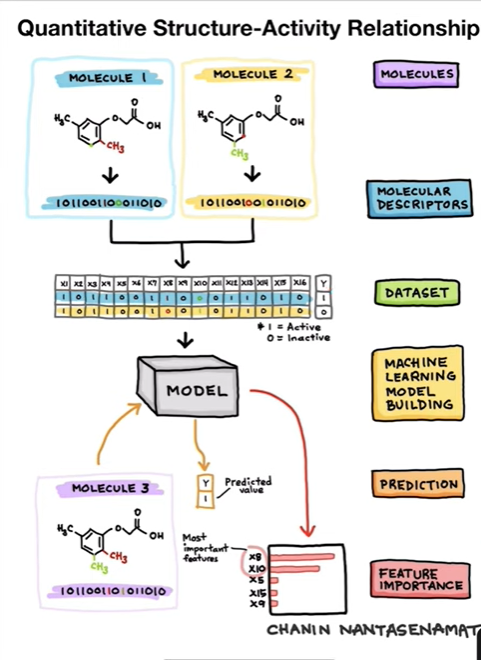

Figure 1: workflow process of QSAR (source: [Data Professor](http://github.com/dataprofessor))


In the example depicted in Figure 1, we observe two molecular chemical structures labeled as molecule 1 and molecule 2. However, in practical scenarios, the number of molecules considered extends far beyond just two; it can encompass hundreds, thousands, or even more!

Each molecule shown undergoes **calculations to derive its molecular descriptors**. These descriptors play a vital role in describing the physicochemical properties that differentiate one molecule from another. In Figure 1, the molecular descriptors are represented by binary values of 1 or 0, indicating the presence or absence of specific molecular features.

The compilation of molecular descriptors for all the molecules in the dataset constitutes the dataframe. The x variables correspond to the molecular descriptors, while the y values correspond to the biological activity that we aim to predict. In Figure 1, a value of 1 signifies an active molecule, whereas a value of 0 denotes inactivity.

The dataset serves as the training data for a machine learning model. The goal is for the model to learn the intricate relationship between the chemical structure and the biological activity. Consequently, in a future scenario, when a molecule with a set of given molecular descriptors is introduced to the predictive model, it can make a prediction regarding the molecule's activity or inactivity.

Furthermore, in addition to predicting activity or inactivity, the model also provides valuable insights into the importance of various features. This information proves critical for biologists and chemists in their pursuit of designing future molecules with enhanced properties and greater robustness.


<div style="background-color: yellow; padding: 10px;">

In this project, our objective is to gather bioactive data for drug-like inhibitor molecules targeting the Beta amyloid A4 protein from the ChRMBL database. We will employ various techniques, including calculating molecular and Lipinski descriptors, as well as molecular fingerprints. Additionally, we aim to construct Machine Learning models based on QSAR (Quantitative Structure-Activity Relationship) to predict the bioactivity data of unknown molecules.
    
</div>

***

# 3. Download Bioactivity Data 

 In this section we will be performing Data Collection and Pre-Processing from the [ChEMBL Database](http://www.ebi.ac.uk/chembl/).
 
 ChEMBL database is a database that contains curated bioactivity data of more than 2 million compounds. 
 It is compiled from more than 76000 documents, 1.2 million assays and the data spans 13000 targets and 1800 cells and 33000 indications. 
 
 Let'install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL database:

## 3.1 Installing and importing libraries

In [2]:
! pip install chembl_webresource_client
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
kfp 1.8.21 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 38.6 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
from chembl_webresource_client.new_client import new_client

## 3.2 Search for target proteins and active molecules

Let's retrieve the compounds data from a datset downloaded from [ChEMBL repository for Beta amyloid A4 protein].
(http://www.ebi.ac.uk/chembl/g/#browse/compounds/filter/_metadata.related_targets.all_chembl_ids%3ACHEMBL2487)
Let's perform a targeted search for Beta amyloid A4 protein. The retrieval process for data from the ChEMBL Database is excessively time-consuming.

In [4]:
# Target search for Beta amyloid A4 protein       # The retrieval process for data from the ChEMBL Database is excessively time-consuming
#target = new_client.target
#target_query = target.search('Beta amyloid A4 protein')
#targets = pd.DataFrame.from_dict(target_query)
#targets

Hence, we import the data for **small molecules** exhibiting activity against the Beta amyloid A4 protein from an xlsx file sourced from the ChEMBL Database:

In [5]:
df = pd.read_excel('/kaggle/input/beta-amyloid-a4-protein-active-compounds/Beta_amyloid A4_protein_active_compounds.xlsx')
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3747578,NaN,None,170.12,0,0.50,"Fig 6B, R4C3",O=C(O)c1c(O)cc(O)cc1O,Inhibition,NaN,...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3745699,1,Scientific Literature,Bioorg Med Chem,2016.0,None,NaN
1,CHEMBL3780448,NaN,None,744.85,3,5.57,14,CC(COC(=O)c1ccc(Oc2nc(Oc3ccc(C(=O)OCC(C)N(C)C)...,Inhibition,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3779862,1,Scientific Literature,Eur J Med Chem,2016.0,None,NaN
2,CHEMBL4087479,NaN,None,284.31,0,3.31,6b,COc1ccc(/C=C/C(=O)c2cccc(O)c2)cc1OC,Inhibition,NaN,...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4316585,1,Scientific Literature,Eur J Med Chem,2019.0,None,NaN
3,CHEMBL4473149,NaN,None,378.81,0,3.91,13c,COCOc1ccc(C(=O)/C=C/c2cccc(Cl)c2)c(O)c1OCOC,Inhibition,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4316585,1,Scientific Literature,Eur J Med Chem,2019.0,None,NaN
4,CHEMBL4474954,NaN,None,270.28,0,3.01,14a,Cc1cccc(/C=C/C(=O)c2ccc(O)c(O)c2O)c1,Inhibition,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4316585,1,Scientific Literature,Eur J Med Chem,2019.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7913,CHEMBL4854341,NaN,None,362.36,0,3.22,6c,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4808191,1,Scientific Literature,Bioorg Med Chem Lett,2021.0,None,NaN
7914,CHEMBL4863383,NaN,None,318.32,0,2.54,2; CHDI-626,[11CH3]Oc1ccc(NC(=O)c2ccn3c(n2)nc2ccccc23)cn1,Activity,NaN,...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4825731,1,Scientific Literature,J Med Chem,2021.0,None,Dose = 1.0 microM | TIME = 2.0 hr
7915,CHEMBL4867379,NaN,None,317.35,0,3.15,15,Cc1cc(NC(=O)c2ccn3c(n2)nc2ccccc23)cnc1C,Activity,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4825731,1,Scientific Literature,J Med Chem,2021.0,None,Dose = 1.0 microM | TIME = 2.0 hr
7916,CHEMBL4850938,NaN,None,414.41,0,3.22,4,CN(C)C(=O)Oc1ccc(C2CC(=O)c3c(O)cc(OC(=O)N(C)C)...,Inhibition,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4825736,1,Scientific Literature,Bioorg Med Chem Lett,2021.0,None,Dose = 25.0 microM


The database contains 7,918 entries of drug-like molecules, each with 45 features.

## 3.3 Data Cleaning and Labeling

Our primary focus within the database is on specific features of drug-like molecules. 

Initially, we ensure that the molecules have been exclusively tested on Homo sapiens as the target organism and that the target type is restricted to single proteins.

In [6]:
# Retrieve unique values for the "Target Organism" column in the dataframe (df)
df["Target Organism"].unique() 

array(['Homo sapiens'], dtype=object)

In [7]:
# Retrieve unique values for the "Target Type" column in the dataframe (df)
df["Target Type"].unique() 

array(['SINGLE PROTEIN'], dtype=object)

Now we select only the molecules containing **IC50** to make our dataset more uniform:


In [8]:
df_ic50 = df[df['Standard Type'] == 'IC50']
df_ic50

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
9,CHEMBL3815078,NaN,None,250.31,0,2.82,14b,Nc1nc(NCc2ccccc2)c2ccccc2n1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4002588,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN
10,CHEMBL4070462,NaN,None,306.41,0,4.10,21s,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4002588,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN
16,CHEMBL153,TROLOX,None,250.29,0,2.49,Trolox,Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)O)O2,IC50,NaN,...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3994611,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN
26,CHEMBL3911126,NaN,None,361.40,0,4.14,3a,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3861992,1,Scientific Literature,Bioorg Med Chem Lett,2016.0,None,NaN
27,CHEMBL3943188,NaN,None,434.49,0,4.62,BDBM155123,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3638627,37,BindingDB Database,NaN,2015.0,CHEMBL3307740,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7893,CHEMBL4846970,NaN,None,450.90,0,3.73,3l,COc1ccc(CNS(=O)(=O)c2cc(C(=O)O)c(NCc3ccco3)cc2...,IC50,NaN,...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4823272,1,Scientific Literature,Eur J Med Chem,2021.0,None,TIME = 1.0 hr
7902,CHEMBL4877793,NaN,None,358.80,0,2.54,3j,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4823272,1,Scientific Literature,Eur J Med Chem,2021.0,None,TIME = 1.0 hr
7903,CHEMBL4848555,NaN,None,412.90,0,3.85,3p,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4823272,1,Scientific Literature,Eur J Med Chem,2021.0,None,TIME = 1.0 hr
7913,CHEMBL4854341,NaN,None,362.36,0,3.22,6c,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4808191,1,Scientific Literature,Bioorg Med Chem Lett,2021.0,None,NaN


**IC50**, which stands for **Half maximal inhibitory concentration**, is a quantitative measure used to assess the potency of a substance in inhibiting a specific biological or biochemical function. It indicates the amount of a particular inhibitory substance, such as a drug, required to inhibit a given biological process or component by 50% in vitro.

In the dataframe, the IC50 value can be found under the column labeled "Standard Value." This value represents the potency of the drug, with lower values indicating greater potency. Ideally, we aim to identify standard values that are as low as possible, indicating a lower concentration of the inhibitory substance required to achieve a 50% inhibition.  

Let's keep thr rows which have nm as "Standard Units" (unit of concentration):

In [9]:
# Filter the DataFrame (df_ic50) to retain only rows where the 'Standard Units' column is equal to 'nM'
df2 = df_ic50[df_ic50['Standard Units'] == 'nM']
df2

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
9,CHEMBL3815078,NaN,None,250.31,0,2.82,14b,Nc1nc(NCc2ccccc2)c2ccccc2n1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4002588,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN
10,CHEMBL4070462,NaN,None,306.41,0,4.10,21s,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4002588,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN
26,CHEMBL3911126,NaN,None,361.40,0,4.14,3a,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3861992,1,Scientific Literature,Bioorg Med Chem Lett,2016.0,None,NaN
27,CHEMBL3943188,NaN,None,434.49,0,4.62,BDBM155123,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3638627,37,BindingDB Database,NaN,2015.0,CHEMBL3307740,NaN
29,CHEMBL3667026,NaN,None,548.39,2,5.24,BDBM145847,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3638565,37,BindingDB Database,NaN,2015.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,CHEMBL4847323,NaN,None,359.37,0,3.76,1d,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4811311,1,Scientific Literature,Bioorg Med Chem,2021.0,None,TIME = 1.0 hr
7902,CHEMBL4877793,NaN,None,358.80,0,2.54,3j,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4823272,1,Scientific Literature,Eur J Med Chem,2021.0,None,TIME = 1.0 hr
7903,CHEMBL4848555,NaN,None,412.90,0,3.85,3p,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4823272,1,Scientific Literature,Eur J Med Chem,2021.0,None,TIME = 1.0 hr
7913,CHEMBL4854341,NaN,None,362.36,0,3.22,6c,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4808191,1,Scientific Literature,Bioorg Med Chem Lett,2021.0,None,NaN


In [10]:
df3 = df2[~df2['Standard Value'].isnull()]
df3

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
9,CHEMBL3815078,NaN,None,250.31,0,2.82,14b,Nc1nc(NCc2ccccc2)c2ccccc2n1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4002588,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN
10,CHEMBL4070462,NaN,None,306.41,0,4.10,21s,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4002588,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN
26,CHEMBL3911126,NaN,None,361.40,0,4.14,3a,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3861992,1,Scientific Literature,Bioorg Med Chem Lett,2016.0,None,NaN
27,CHEMBL3943188,NaN,None,434.49,0,4.62,BDBM155123,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3638627,37,BindingDB Database,NaN,2015.0,CHEMBL3307740,NaN
29,CHEMBL3667026,NaN,None,548.39,2,5.24,BDBM145847,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL3638565,37,BindingDB Database,NaN,2015.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,CHEMBL4847323,NaN,None,359.37,0,3.76,1d,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4811311,1,Scientific Literature,Bioorg Med Chem,2021.0,None,TIME = 1.0 hr
7902,CHEMBL4877793,NaN,None,358.80,0,2.54,3j,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4823272,1,Scientific Literature,Eur J Med Chem,2021.0,None,TIME = 1.0 hr
7903,CHEMBL4848555,NaN,None,412.90,0,3.85,3p,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4823272,1,Scientific Literature,Eur J Med Chem,2021.0,None,TIME = 1.0 hr
7913,CHEMBL4854341,NaN,None,362.36,0,3.22,6c,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,IC50,'=',...,Beta amyloid A4 protein,Homo sapiens,SINGLE PROTEIN,CHEMBL4808191,1,Scientific Literature,Bioorg Med Chem Lett,2021.0,None,NaN


Next, we will verify if the following columns in the dataframe have all non-null values: "Standard Value," "Standard Units," "Standard Type," and "Molecule ChEMBL ID":

In [11]:
#Count the number of null values in each column of the DataFrame (df3)
df3.isnull().sum()

Molecule ChEMBL ID               0
Molecule Name                 1195
Molecule Max Phase               0
Molecular Weight                 0
#RO5 Violations                  0
AlogP                            0
Compound Key                     0
Smiles                           0
Standard Type                    0
Standard Relation                4
Standard Value                   0
Standard Units                   0
pChEMBL Value                  198
Data Validity Comment         1270
Comment                       1164
Uo Units                         0
Ligand Efficiency BEI          235
Ligand Efficiency LE           235
Ligand Efficiency LLE          235
Ligand Efficiency SEI          235
Potential Duplicate              0
Assay ChEMBL ID                  0
Assay Description                0
Assay Type                       0
BAO Format ID                    0
BAO Label                        0
Assay Organism                   0
Assay Tissue ChEMBL ID           0
Assay Tissue Name   

"Standard Value," "Standard Units," , "Molecular Weight", "Standard Type," and "Molecule ChEMBL ID" have all 0 null values.

Now we create a new database with only the features we are interested in:

In [12]:
selection = ['Molecule ChEMBL ID','Molecular Weight', 'Smiles','Standard Value'] # Define a list of column names to be selected from df3
df4 = df3[selection]                           # Create a new DataFrame (df4) by selecting the columns specified in the selection list from df3
df4.reset_index(drop=True, inplace=True)      # Reset the index of df4 to start from 0, dropping the old index column
df4

,Molecule ChEMBL ID,Molecular Weight,Smiles,Standard Value
0,CHEMBL3815078,250.31,Nc1nc(NCc2ccccc2)c2ccccc2n1,4800.0
1,CHEMBL4070462,306.41,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,3800.0
2,CHEMBL3911126,361.40,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,520.0
3,CHEMBL3943188,434.49,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,4.8
4,CHEMBL3667026,548.39,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,1300.0
...,...,...,...,...
1314,CHEMBL4847323,359.37,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,106820.0
1315,CHEMBL4877793,358.80,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,137390.0
1316,CHEMBL4848555,412.90,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,115520.0
1317,CHEMBL4854341,362.36,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,1560.0


Let's saves the final dataframe to CSV file:



In [13]:
df4.to_csv('Beta_amyloid_A4_protein_bioactivity_data_curated.csv', index=False)

## 3.4 Labeling compounds as either being active, inactive or intermediate

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [14]:
bioactivity_threshold = []           # Create an empty list to store the bioactivity thresholds
for i in df4["Standard Value"]:      # Iterate over the "Standard Value" column in df4
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [15]:
# Create a pandas Series called "bioactivity_class" using the "bioactivity_threshold" list, with the name 'class'
bioactivity_class = pd.Series(bioactivity_threshold, name='class')   

#Concatenate the DataFrame df4 and the "bioactivity_class" Series along the columns (axis=1)
df5 = pd.concat([df4, bioactivity_class], axis=1)                   
df5

,Molecule ChEMBL ID,Molecular Weight,Smiles,Standard Value,class
0,CHEMBL3815078,250.31,Nc1nc(NCc2ccccc2)c2ccccc2n1,4800.0,intermediate
1,CHEMBL4070462,306.41,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,3800.0,intermediate
2,CHEMBL3911126,361.40,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,520.0,active
3,CHEMBL3943188,434.49,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,4.8,active
4,CHEMBL3667026,548.39,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,1300.0,intermediate
...,...,...,...,...,...
1314,CHEMBL4847323,359.37,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,106820.0,inactive
1315,CHEMBL4877793,358.80,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,137390.0,inactive
1316,CHEMBL4848555,412.90,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,115520.0,inactive
1317,CHEMBL4854341,362.36,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,1560.0,intermediate


In [16]:
df5.to_csv('Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled.csv', index=False)

***

# 4. Exploratory Data Analysis (EDA)

Lets' install **conda** and **rdkit** for calculating molecular descriptors of the drug-like molecules in the dataframe:

In [17]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-06-04 19:03:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   250MB/s    in 0.3s    

2023-06-04 19:03:31 (250 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## 4.1 Calculating Lipinski Descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

The partition coefficient, abbreviated P, is defined as a particular ratio of the concentrations of a solute between the two solvents (octanol and water biphase solution), specifically for un-ionized solutes, and the logarithm of the ratio is thus LogP. The values taken by LogP are typically negative for substances with a high hydrophilic character, while they are positive and progressively increase with increasing hydrophobic character.

In [18]:
#Import libraries
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [19]:
# This function takes a list of SMILES strings as input and calculates Lipinski descriptors for each molecule. 
#The Lipinski descriptors provide information about the drug-likeness and molecular properties of the compounds. 
#The function iterates over the list of SMILES strings, converts each string into a molecule object using the RDKit library, 
#and then calculates descriptors such as the logarithm of the partition coefficient (LogP), the number of hydrogen bond donors (NumHDonors), 
#and the number of hydrogen bond acceptors (NumHAcceptors) for each molecule. The calculated descriptors are stored in a pandas DataFrame and returned 
#as the output of the function.
def lipinski(smiles, verbose=False):

    moldata= []                     # Initialize an empty list to store molecule objects
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) # Convert SMILES string to a molecule object
        moldata.append(mol)          # Append the molecule object to the moldata list
    
       
    baseData= np.arange(1,1)        # Initialize an empty numpy array
    i=0                             
    for mol in moldata:        
       
       # Calculate Lipinski descriptors for each molecule
        
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):           # If it's the first iteration, assign row to baseData
            baseData=row
        else:
            baseData=np.vstack([baseData, row])   # Vertically stack row on top of baseData for subsequent iterations
        i=i+1                                     # Increment the counter variable
        i=i+1      
    
    columnNames=["LogP","NumHDonors","NumHAcceptors"]    # Column names for the DataFrame 
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)  # Create a DataFrame with the calculated Lipinski descriptors
    
    return descriptors
     

In [20]:
df_lipinski = lipinski(df5["Smiles"]) # Calculate Lipinski descriptors for molecules in the "Smiles" column of df5
df_lipinski

,LogP,NumHDonors,NumHAcceptors
0,2.82410,2.0,4.0
1,4.10470,2.0,4.0
2,4.13700,2.0,4.0
3,4.61948,1.0,5.0
4,5.24080,3.0,7.0
...,...,...,...
1314,3.76490,0.0,3.0
1315,2.54150,3.0,5.0
1316,3.85430,3.0,5.0
1317,3.21540,2.0,4.0


Now let's combine the two dataframes (df5 and df_lipinski) in a new dataframe called df_combined:

In [21]:
df_combined = pd.concat([df5,df_lipinski], axis=1)
df_combined

,Molecule ChEMBL ID,Molecular Weight,Smiles,Standard Value,class,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3815078,250.31,Nc1nc(NCc2ccccc2)c2ccccc2n1,4800.0,intermediate,2.82410,2.0,4.0
1,CHEMBL4070462,306.41,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,3800.0,intermediate,4.10470,2.0,4.0
2,CHEMBL3911126,361.40,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,520.0,active,4.13700,2.0,4.0
3,CHEMBL3943188,434.49,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,4.8,active,4.61948,1.0,5.0
4,CHEMBL3667026,548.39,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,1300.0,intermediate,5.24080,3.0,7.0
...,...,...,...,...,...,...,...,...
1314,CHEMBL4847323,359.37,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,106820.0,inactive,3.76490,0.0,3.0
1315,CHEMBL4877793,358.80,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,137390.0,inactive,2.54150,3.0,5.0
1316,CHEMBL4848555,412.90,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,115520.0,inactive,3.85430,3.0,5.0
1317,CHEMBL4854341,362.36,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,1560.0,intermediate,3.21540,2.0,4.0


## 4.2 Convert IC50 to pIC50

In order to make more even the  values of "Standard Value" in the dataframe, we convert **IC50** to the **negative logarithmic** scale which is **-log10(IC50)**:

In [22]:
df_combined["Standard Value"] = df_combined["Standard Value"] / 1000000000  # Convert from nM to M
df_combined["Standard Value"] = -np.log10(df_combined["Standard Value"])  # Apply logarithm
df_combined

,Molecule ChEMBL ID,Molecular Weight,Smiles,Standard Value,class,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3815078,250.31,Nc1nc(NCc2ccccc2)c2ccccc2n1,5.318759,intermediate,2.82410,2.0,4.0
1,CHEMBL4070462,306.41,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,5.420216,intermediate,4.10470,2.0,4.0
2,CHEMBL3911126,361.40,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,6.283997,active,4.13700,2.0,4.0
3,CHEMBL3943188,434.49,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,8.318759,active,4.61948,1.0,5.0
4,CHEMBL3667026,548.39,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,5.886057,intermediate,5.24080,3.0,7.0
...,...,...,...,...,...,...,...,...
1314,CHEMBL4847323,359.37,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,3.971347,inactive,3.76490,0.0,3.0
1315,CHEMBL4877793,358.80,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,3.862045,inactive,2.54150,3.0,5.0
1316,CHEMBL4848555,412.90,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,3.937343,inactive,3.85430,3.0,5.0
1317,CHEMBL4854341,362.36,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,5.806875,intermediate,3.21540,2.0,4.0


In [23]:
df_combined.rename(columns={'Standard Value': 'pIC50'}, inplace=True)  # Rename the 'Standard Value' column to 'pIC50'
df_combined

,Molecule ChEMBL ID,Molecular Weight,Smiles,pIC50,class,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3815078,250.31,Nc1nc(NCc2ccccc2)c2ccccc2n1,5.318759,intermediate,2.82410,2.0,4.0
1,CHEMBL4070462,306.41,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,5.420216,intermediate,4.10470,2.0,4.0
2,CHEMBL3911126,361.40,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,6.283997,active,4.13700,2.0,4.0
3,CHEMBL3943188,434.49,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,8.318759,active,4.61948,1.0,5.0
4,CHEMBL3667026,548.39,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,5.886057,intermediate,5.24080,3.0,7.0
...,...,...,...,...,...,...,...,...
1314,CHEMBL4847323,359.37,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,3.971347,inactive,3.76490,0.0,3.0
1315,CHEMBL4877793,358.80,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,3.862045,inactive,2.54150,3.0,5.0
1316,CHEMBL4848555,412.90,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,3.937343,inactive,3.85430,3.0,5.0
1317,CHEMBL4854341,362.36,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,5.806875,intermediate,3.21540,2.0,4.0


In [24]:
df_combined["pIC50"].describe() # Visualize distribution of pIC50 values

count    1319.000000
mean        5.733343
std         1.329232
min         3.096910
25%         4.768532
50%         5.327902
75%         6.710619
max         9.522879
Name: pIC50, dtype: float64

Let's write this to CSV file:

In [25]:
df_combined.to_csv('Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled_3class_pIC50.csv')

## 4.3 Removing the 'intermediate' bioactivity class

In order to easily compare between **active** and **inactive** compounds, we have to delete from our analysis intermediate compounds from the dataframe:

In [26]:
df_2class = df_combined[df_combined['class'] != 'intermediate']
df_2class

,Molecule ChEMBL ID,Molecular Weight,Smiles,pIC50,class,LogP,NumHDonors,NumHAcceptors
2,CHEMBL3911126,361.40,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,6.283997,active,4.13700,2.0,4.0
3,CHEMBL3943188,434.49,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,8.318759,active,4.61948,1.0,5.0
5,CHEMBL140,368.39,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,4.727462,inactive,3.36990,2.0,6.0
7,CHEMBL195970,313.15,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,4.026872,inactive,4.98760,1.0,1.0
8,CHEMBL3814103,264.33,Cc1cccc(CNc2nc(N)c3ccccc3n2)c1,4.602060,inactive,3.13252,2.0,4.0
...,...,...,...,...,...,...,...,...
1312,CHEMBL3670368,451.38,C[C@@]1(c2nc(NC(=O)c3ncc(C#N)cc3N)ccc2F)CO[C@@...,8.301030,active,2.24548,3.0,8.0
1313,CHEMBL3653404,490.26,C[C@@]1(c2cc(NC(=O)c3ncc(Br)cn3)ccc2F)CO[C@@](...,8.301030,active,3.55410,2.0,6.0
1314,CHEMBL4847323,359.37,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,3.971347,inactive,3.76490,0.0,3.0
1315,CHEMBL4877793,358.80,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,3.862045,inactive,2.54150,3.0,5.0


Let's write this to CSV file:

In [27]:
df_2class.to_csv('Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled_2class_pIC50.csv')

## 4.4 Exploratory Data Analysis  via Lipinski Descriptors

### 4.4.1 How many active and inactive compunds?

To begin with, our objective is to determine the count of active and inactive compounds within the dataframe:

In [28]:
# Import libraries
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import plotly.express as px

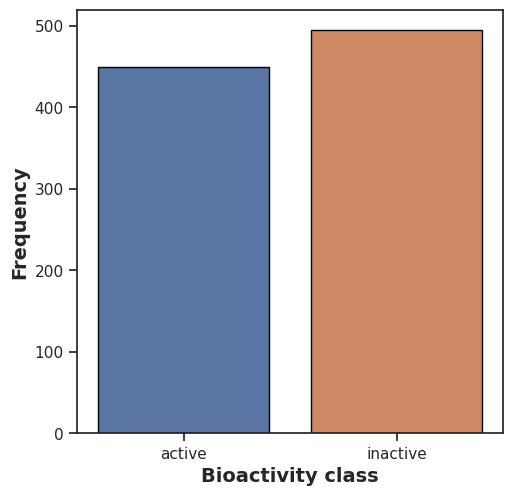

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In the dataframe there are **495 inactive compounds** and **449 active compounds**.

### 4.4.2 Molecular Weight and LogP chemical spaces

It can be seen that the 2 bioactivity classes are spanning a very similar chemical spaces as evident by the scatter plot of MW vs LogP.



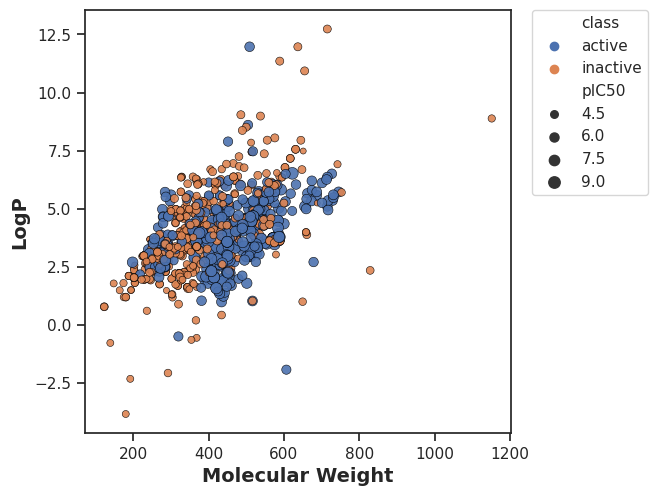

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='Molecular Weight', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.9)

plt.xlabel('Molecular Weight', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### 4.4.3 Distribution of pIC50 Values

We aim to examine the distribution of pIC50 values for both active and inactive compounds to assess whether a significant non-overlapping pattern exists between the two classes:

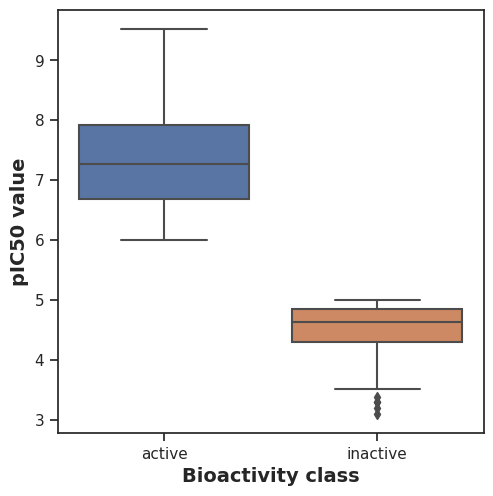

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_ic50.pdf')

In [32]:
# Select only the rows in the DataFrame where the "class" column is equal to "active" and calculate descriptive statistics using the describe() function.
df_2class[df_2class["class"] == "active"].describe()

,Molecular Weight,pIC50,LogP,NumHDonors,NumHAcceptors
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,447.740356,7.328325,4.002769,1.434298,5.708241
std,112.946492,0.849335,1.310943,1.079757,1.686858
min,198.270000,6.000000,-1.926800,0.000000,0.000000
25%,373.470000,6.677781,3.216100,1.000000,5.000000
50%,449.410000,7.267606,3.930300,1.000000,5.000000
75%,522.070000,7.920819,4.906100,2.000000,7.000000
max,745.100000,9.522879,11.969700,8.000000,14.000000


In [33]:
# Select only the rows in the DataFrame where the "class" column is equal to "inactive" and calculate descriptive statistics using the describe() function.
df_2class[df_2class["class"] == "inactive"].describe()

,Molecular Weight,pIC50,LogP,NumHDonors,NumHAcceptors
count,495.000000,495.000000,495.000000,495.000000,495.000000
mean,383.120263,4.528039,3.915112,2.008081,4.917172
std,125.885991,0.401839,1.886016,1.391099,2.329013
min,123.110000,3.096910,-3.834600,0.000000,1.000000
25%,300.375000,4.301030,2.645300,1.000000,3.000000
50%,360.320000,4.638272,3.680800,2.000000,5.000000
75%,463.270000,4.844675,5.115210,3.000000,6.000000
max,1151.420000,5.000000,12.733440,8.000000,16.000000


The distribution of **active** compounds exhibits a wide range, with pIC50 values ranging from 6 to 9.5 and a mean of 7.3. No outliers are detected within this distribution.

In contrast, the distribution of **inactive** compounds appears more flattened, with pIC50 values ranging from 3.1 to 5 and a mean of 4.5. There are  visible outlier points below the minimum value in this distribution.

### 4.4.4 Distribution of Molecular Weights Values

We aim to examine the distribution of molecular weight values for both active and inactive compounds to assess whether a significant non-overlapping pattern exists between the two classes:

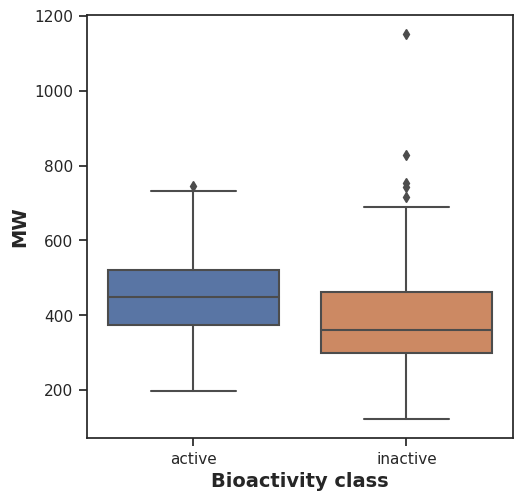

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'Molecular Weight', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.savefig('plot_MW.pdf')

In [35]:
# Compute descriptive statistics for the "Molecular Weight" column using the describe() function.
df_2class["Molecular Weight"].describe()

count     944.000000
mean      413.855879
std       124.116355
min       123.110000
25%       321.340000
50%       406.500000
75%       511.810000
max      1151.420000
Name: Molecular Weight, dtype: float64

Based on the molecular weight descriptor, there is no clear discrimination between active and inactive compounds. Both classes of compounds appear to cover a similar range, starting from 123 Daltons and reaching a maximum of 790 Daltons, with numerous outlier points beyond the maximum value.

### 4.4.5 Distribution of LogP Values

We aim to examine the distribution of LogP values for both active and inactive compounds to assess whether a significant non-overlapping pattern exists between the two classes:

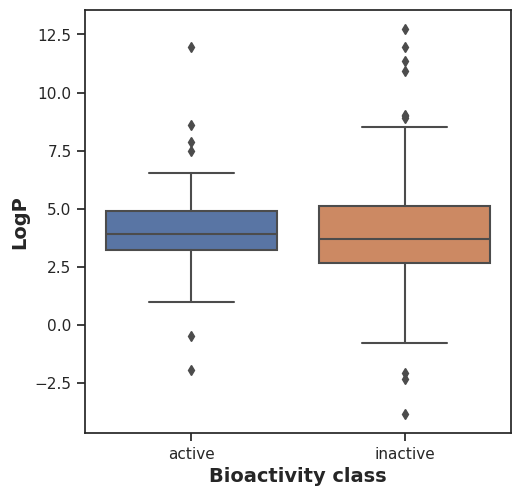

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('plot_LogP.pdf')

In [37]:
# Compute descriptive statistics for the "LogP" column using the describe() function.
df_2class["LogP"].describe()

count    944.000000
mean       3.956805
std        1.637613
min       -3.834600
25%        2.945850
50%        3.819300
75%        4.950250
max       12.733440
Name: LogP, dtype: float64

Based on the LogP descriptor, there is no clear discrimination between active and inactive compounds. Both classes of compounds appear to cover a similar large range, starting from -3.8 and reaching a maximum of 12.7, including the numerous outlier points below and beyond the distributions.

### 4.4.6 Distribution of Hydrogen Bond Donor Groups

We aim to examine the distribution of hydrogen bond donor groups  values for both active and inactive compounds to assess whether a significant non-overlapping pattern exists between the two classes:

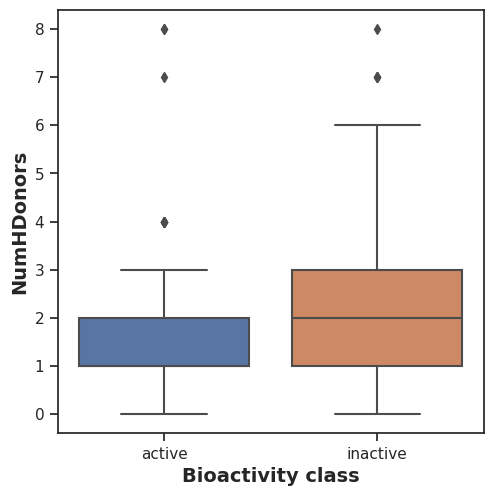

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHDonors.pdf')

In [39]:
#Filter the DataFrame df_2class to include only the rows where the "class" column is equal to "active"
#Select the "NumHDonors" column from the filtered DataFrame
#Calculate the descriptive statistics using the describe() function
print("Hydrogen Bond Donor Groups descripive statistics for active compunds")
df_2class[df_2class["class"] == "active"]["NumHDonors"].describe()

Hydrogen Bond Donor Groups descripive statistics for active compunds


count    449.000000
mean       1.434298
std        1.079757
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: NumHDonors, dtype: float64

In [40]:
#Filter the DataFrame df_2class to include only the rows where the "class" column is equal to "inactive"
#Select the "NumHDonors" column from the filtered DataFrame
#Calculate the descriptive statistics using the describe() function
print("Hydrogen Bond Donor Groups descripive statistics for inactive compunds")
df_2class[df_2class["class"] == "inactive"]["NumHDonors"].describe()

Hydrogen Bond Donor Groups descripive statistics for inactive compunds


count    495.000000
mean       2.008081
std        1.391099
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: NumHDonors, dtype: float64

Based on the analysis of hydrogen bond donor groups, a **partial discrimination** between active and inactive compounds can be observed. While there is some overlap between the two classes when the number of hydrogen bond donor groups ranges from 0 to 3, **no active compounds (excluding outlier points) are observed beyond 3 hydrogen bond donor groups.**

### 4.4.7 Distribution of Hydrogen Bond Acceptor Groups

We aim to examine the distribution of hydrogen bond acceptor groups values for both active and inactive compounds to assess whether a significant non-overlapping pattern exists between the two classes:

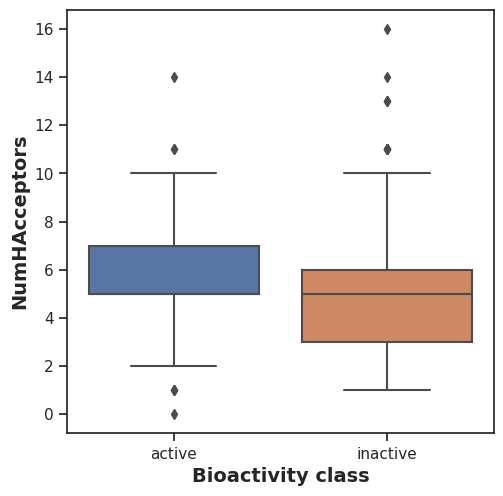

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHAcceptors.pdf')

Based on the analysis of hydrogen bond acceptor groups, no significant discrimination between active and inactive compounds is evident. However, one observation is worth noting: **below a threshold of 2 hydrogen bond acceptor groups, no active compounds are observed** (excluding the 2 outlier points).

## 4.5 Key Findings: Exploratory Data Analysis (EDA)


   **pIC50 values**
<div style="background-color: #9AFF9A; padding: 10px;">
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.
</div>

**Lipinski's descriptors**
<div style="background-color: #FF8080; padding: 10px;">
All of the 4 Lipinski's descriptors exhibited no statistically significant difference between the actives and inactives.
</div>
    
<div style="background-color: #9AFF9A; padding: 10px;">
Based only on the analysis of hydrogen bond donor groups, a partial discrimination between active and inactive compounds can be observed. While there is some overlap between the two classes when the number of hydrogen bond donor groups ranges from 0 to 3, no active compounds (excluding outlier points) are observed beyond 3 hydrogen bond donor groups.

***

# 5. Descriptor Calculation and Dataset Preparation

In this section, we will be calculating molecular descriptors that are essentially **quantitative description of the compounds in the dataset**. Finally, we will be preparing this into a dataset for subsequent model building in part 6.

**Molecular descriptors** are numerical representations or properties that describe the characteristics of a molecule. These descriptors can capture various aspects of a molecule's structure, such as its size, shape, polarity, and chemical composition. Molecular descriptors provide quantitative information that can be used to compare and analyze different molecules.

On the other hand, a **fingerprint** in the context of molecular chemistry refers to a binary representation of a molecule's structural features or substructures. It is typically derived from the molecular structure using algorithms or mathematical methods. Molecular fingerprints encode information about the presence or absence of certain chemical features or patterns in a molecule. Fingerprinting techniques are commonly used in chemical informatics and drug discovery to compare molecules, identify similar compounds, or perform virtual screening of large compound libraries.

In [42]:
# Download PaDEL-Descriptor 

#PaDEL (Passive ADME (Absorption, Distribution, Metabolism, and Excretion) Learning) descriptors are a set of molecular descriptors calculated 
#using the PaDEL-Descriptor software. These descriptors provide quantitative information about various molecular properties, including chemical 
#features, topological information, constitutional characteristics, and substructure patterns. PaDEL descriptors can be used to assess the pharmacokinetic 
#and physicochemical properties of compounds, aiding in drug discovery and development processes.

#PaDEL-Descriptor calculates a comprehensive set of over 5,000 descriptors for a given molecule, covering a wide range of structural and physicochemical attributes. 
#These descriptors include features such as molecular weight, logP (partition coefficient), hydrogen bond donor/acceptor counts, polar surface area, and many others.
#PaDEL-Descriptor is widely used in chemoinformatics and computational chemistry to extract relevant information from chemical structures and facilitate quantitative 
#structure-activity relationship (QSAR) modeling, virtual screening, and compound property prediction.

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-06-04 19:04:32--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-06-04 19:04:33--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   138MB/s    in 0.2s    

2023-06-04 19:04:35 (138 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-06-04 19:04:36--  https://gith

In [43]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In this analysis, we will utilize the **Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled_3class_pIC50.csv** file, which contains the curated and labeled data for three classes of molecule bioactivity: active, inactive, and intermediate. We will specifically focus on the pIC50 values from this dataset to construct a regression model.

In [44]:
# Load Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled_3class_pIC50.csv file and save it in the df_padel dataframe
df_padel = pd.read_csv('/kaggle/working/Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled_3class_pIC50.csv')
df_padel

,Unnamed: 0,Molecule ChEMBL ID,Molecular Weight,Smiles,pIC50,class,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL3815078,250.31,Nc1nc(NCc2ccccc2)c2ccccc2n1,5.318759,intermediate,2.82410,2.0,4.0
1,1,CHEMBL4070462,306.41,CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1,5.420216,intermediate,4.10470,2.0,4.0
2,2,CHEMBL3911126,361.40,COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]...,6.283997,active,4.13700,2.0,4.0
3,3,CHEMBL3943188,434.49,CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c...,8.318759,active,4.61948,1.0,5.0
4,4,CHEMBL3667026,548.39,O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=...,5.886057,intermediate,5.24080,3.0,7.0
...,...,...,...,...,...,...,...,...,...
1314,1314,CHEMBL4847323,359.37,COc1cc(/C=C/C(=O)N2CC(F)(F)C2)ccc1OCc1ccccc1,3.971347,inactive,3.76490,0.0,3.0
1315,1315,CHEMBL4877793,358.80,CCNS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,3.862045,inactive,2.54150,3.0,5.0
1316,1316,CHEMBL4848555,412.90,O=C(O)c1cc(S(=O)(=O)NC2CCCCC2)c(Cl)cc1NCc1ccco1,3.937343,inactive,3.85430,3.0,5.0
1317,1317,CHEMBL4854341,362.36,O=C(Nc1ccc2nc3n(c(=O)c2c1)CCC3)c1cc2cc(F)ccc2[...,5.806875,intermediate,3.21540,2.0,4.0


## 5.1 Calculate Fingerprint Descriptors

Lets' select only **Smiles** along with the **Molecule ChEMBL** ID columns and let's put them in the new dataframe df3_selection:

In [45]:
selection = ['Smiles','Molecule ChEMBL ID']  # Define the selection of columns
df3_selection = df_padel[selection]          # Select the desired columns from df_padel
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False) # Save the selected columns to a file named 'molecule.smi' in tab-separated format

In [46]:
! cat molecule.smi | head -5      # Ensure molecule.smi file is not empty

Nc1nc(NCc2ccccc2)c2ccccc2n1	CHEMBL3815078
CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1	CHEMBL4070462
COc1cc(O)ccc1/C=C/C(=O)CC(=O)/C=C/c1ccc2cc[nH]c2c1	CHEMBL3911126
CO[C@H]1CC[C@]2(CC1)Cc1cc(F)c(-c3cc(F)cc(C#N)c3)cc1C21N=C(C)C(N)=N1	CHEMBL3943188
O=C(O)CCC(C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1)C(=O)/C=C/c1ccc(O)c(OC(F)(F)F)c1	CHEMBL3667026
cat: write error: Broken pipe


In [47]:
! cat molecule.smi | wc -l  # Count the number of molecules in the molecule.smi file

1319


### 5.1.1 Calculate PaDEL Descriptors

In [48]:
!pip install padelpy
! bash padel.sh   # Run padel descriptors on the molecules in the molecule.smi file and write them in the descriptors_output.csv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 3.3 MB/s eta 0:00:00
Processing CHEMBL3815078 in molecule.smi (1/1319). 
Processing CHEMBL3911126 in molecule.smi (3/1319). 
Processing CHEMBL4070462 in molecule.smi (2/1319). 
Processing CHEMBL3943188 in molecule.smi (4/1319). 
Processing CHEMBL3667026 in molecule.smi (5/1319). Average speed: 3.52 s/mol.
Processing CHEMBL140 in molecule.smi (6/1319). Average speed: 1.94 s/mol.
Processing CHEMBL2146608 in molecule.smi (7/1319). Average speed: 1.34 s/mol.
Processing CHEMBL195970 in molecule.smi (8/1319). Average speed: 1.11 s/mol.
Processing CHEMBL3814103 in molecule.smi (9/1319). Average speed: 0.96 s/mol.
Processing CHEMBL3813971 in molecule.smi (10/1319). Average speed: 0.82 s/mol.
Processing CHEMBL4475538 in molecule.smi (11/1319). Average speed: 0.76 s/mol.
Processing CHEMBL4527242 in molecule.smi (13/1319). Average speed: 0.62 s/mol.
Processing CHEMBL4440350 in molecule.smi (12/1319). Average speed: 0.69 s/mol.
Processing 

In [49]:
! ls -l  # Ensure descriptors_output.csv is present 

total 112592
-rw-r--r-- 1 root root   109410 Jun  4 19:03 Beta_amyloid_A4_protein_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   121889 Jun  4 19:03 Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled.csv
-rw-r--r-- 1 root root   124425 Jun  4 19:04 Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled_2class_pIC50.csv
-rw-r--r-- 1 root root   174844 Jun  4 19:04 Beta_amyloid_A4_protein_bioactivity_data_curated_and_labelled_3class_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
drwxr-xr-x 3 root root     4096 Jun  4 19:04 __MACOSX
---------- 1 root root  1176614 Jun  4 19:07 __notebook__.ipynb
-rw-r--r-- 1 root root  2355916 Jun  4 19:07 descriptors_output.csv
-rw-r--r-- 1 root root    91253 Jun  4 19:04 molecule.smi
-rw-r--r-- 1 root root      231 Jun  4 19:04 padel.sh
-rw-r--r-- 1 root root 25768637 Jun  4 19:04 padel.zip
-rw-r--r-- 1 root root    13934 

## 5.2 Preparing the X and Y Data Matrices

### 5.2.1 Prepare X matrix

Let's save the Padel calculated descriptors in a new dataframe, **df3_X**, where "X" represents the **Padel feature that will be used as an independent variable in the ML models** that will be built in Part 4:

In [50]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3815078,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3911126,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4070462,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3943188,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL140,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,CHEMBL4877793,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1315,CHEMBL4847323,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1316,CHEMBL4848555,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1317,CHEMBL4854341,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df3_X = df3_X.drop(columns=['Name']) # Drop the 'Name' column from df3_X, since it is not a Padel numerical descriptor
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1315,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1316,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1317,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 5.2.2 Prepare Y matrix

Let's store the **pIC50** values in a new dataframe called df3_Y, where **"Y" represents the target values that will be attempted to be predicted in the ML models** to be built in Part 4:

In [52]:
df3_Y = df_padel['pIC50']
df3_Y

0       5.318759
1       5.420216
2       6.283997
3       8.318759
4       5.886057
          ...   
1314    3.971347
1315    3.862045
1316    3.937343
1317    5.806875
1318    5.485452
Name: pIC50, Length: 1319, dtype: float64

### 5.2.3 Combining X and Y variable

Finally, let's combine X and Y variables in a final dataframe, dataset3:

In [53]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)  # Concatenate df3_X and df3_Y along the columns axis to create a new dataframe, dataset3
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.318759
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.420216
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.283997
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.318759
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.971347
1315,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.862045
1316,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.937343
1317,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.806875


dataset3 dataframe contains **881 input features and 1 output variable (pIC50 values)**.

In [54]:
# Let's download the CSV file  for the Part 4 (Model Building)
dataset3.to_csv('Beta_amyloid_A4_protein_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)  

***

# 6 Predictive Regression Models using Machine Learning

In [55]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 6.1 Remove Low Variance Features

Removing low variance features involves identifying the **features whose values remain almost constant or vary very little across the dataset**. These features **contribute minimal or no useful information to the learning algorithm** and can potentially hinder its performance, as well make process slower and less efficient.

In [56]:
from sklearn.feature_selection import VarianceThreshold
threshold=(.8 * (1 - .8))                   # Define the threshold value as 80% of the variance between 0 and 1
selection = VarianceThreshold(threshold)    # Create an instance of VarianceThreshold with the defined threshold
X = selection.fit_transform(df3_X)          # Apply the feature selection to the input dataframe df3_X
X.shape                                     # Print the shape of the transformed data

(1319, 177)

Out of the 881 input features in the dataset, **only 177 features have a variance equal to or higher than 80% within the range of 0 to 1**. These 177 features will be used exclusively for constructing machine learning models, while the remaining features will be disregarded.

## 6.2 Data split 

In [57]:
Y = df3_Y    # Assign the dataset name "df3_Y" to the variable name "Y".
Y.shape

(1319,)

To split the data into **training and testing sets**, we will use the train_test_split function. Additionally, we will further divide the training data into a validation set, which will be used for fine-tuning the model. The split will be done as follows:

The parameter **"test_size" will be set to 0.2**, which means that 80% of the dataset will be used for training the model, and the remaining 20% will be used for testing it.
The training data and test data will be assigned to the following labels:

**X_train**: Training data features;
**X_test**: Testing data features;
**Y_train**: Training data target variable;
**Y_test**: Testing data target variable;

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [59]:
X_train.shape, Y_train.shape

((1055, 177), (1055,))

In [60]:
X_test.shape, Y_test.shape

((264, 177), (264,))

The model will be trained using 1055 rows of data, while 264 rows will be reserved for testing its performance.

In [61]:
print("number of training samples :", X_train.shape[0])  # Print the number of samples in the testing set
print("number of test samples:",X_test.shape[0]) # Print the number of samples in the training set

number of training samples : 1055
number of test samples: 264


## 6.3  Compare ML Models

Considering the complexity of our dataframe with 177 features, finding a reliable machine learning model that can accurately reproduce and predict the pIC50 values is a challenging task. To overcome this challenge, we will compare and evaluate multiple machine learning algorithms to construct regression models specifically for Beta_amyloid_A4_protein inhibitors. This approach will allow us to explore different modeling techniques and identify the most suitable algorithm for our dataset.

In [62]:
! pip install lazypredict

import lazypredict
from lazypredict.Supervised import LazyRegressor

In [63]:
# Import Libraries
import lazypredict
from lazypredict.Supervised import LazyRegressor

The **LazyRegressor** is a utility class from the lazy_regression library that provides a simplified way to evaluate and compare multiple regression models. It automatically fits and evaluates various regression algorithms on a given dataset, providing quick insights into the performance of different models.

In [64]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)  # Creates an instance of the LazyRegressor class with specified parameters.
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:55<00:00,  1.32s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:55<00:00,  1.31s/it]


Let's take a look at the  **performance table of the training set** 

In [65]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.65,0.71,0.72,0.12
ExtraTreeRegressor,0.65,0.71,0.72,0.07
ExtraTreesRegressor,0.65,0.71,0.72,2.24
GaussianProcessRegressor,0.65,0.71,0.72,0.59
XGBRegressor,0.64,0.70,0.73,1.24
RandomForestRegressor,0.55,0.63,0.81,1.72
BaggingRegressor,0.52,0.60,0.84,0.20
MLPRegressor,0.47,0.56,0.88,2.02
HistGradientBoostingRegressor,0.42,0.52,0.92,0.83


And now let's take a look at the **performance of the test set**:


In [66]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GammaRegressor,-1.92,0.05,1.30,0.03
BayesianRidge,-1.92,0.05,1.30,0.06
TweedieRegressor,-1.92,0.05,1.30,0.04
NuSVR,-1.93,0.04,1.30,0.19
ElasticNetCV,-1.93,0.04,1.30,6.92
LassoCV,-1.93,0.04,1.30,6.78
LassoLarsCV,-1.94,0.04,1.30,0.17
LassoLarsIC,-1.95,0.04,1.30,0.11
OrthogonalMatchingPursuitCV,-1.96,0.03,1.31,0.06


# 7. Provisional Conclusions



Exploratory Data Analysis (EDA) reveals that there is a partial discrimination between active and inactive compounds based on the analysis of hydrogen bond donor groups. Although there is some overlap between the two classes when the number of hydrogen bond donor groups ranges from 0 to 3, no active compounds (excluding outlier points) are observed beyond 3 hydrogen bond donor groups.

However, the application of Machine Learning Models for regression to predict the bioactivity of drug-like molecules (pIC50 predicted values) does not yield satisfactory results. Therefore, further analysis of the dataset and potential manipulation of the data are necessary to improve the predictions.

***

Author: **Nicola Scafuri**